# N.B.
- [ ] Create a class to save data into a file
- [ ] Check pauses into the codes and remove redundant ones (or add them if necessary).
- [ ] With sGen.pul_trig_mode(**'AUTO'**) there aren't errors, instead with sGen.pul_trig_mode(**'SING'**) (theorically more correct) the code stops working.  
    *-1074118634: The trigger has not occurred for the requested buffer, so data cannot be fetched relative to the trigger.*
- [ ] controllare se ad alte frequenze se le oscillazioni si vedono anche sull'oscilloscopio
- [ ] CHIEDERE RIGUARDO AI BATTIMENTI (ES SWEEP 39)



In [192]:
# Uscita trigger dal signal generator: Pulse Sync

%matplotlib widget
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import h5py
import time
import numpy as np

import sys
sys.path.insert(1, '..\\Instruments\\network\\Signal_Generator')
sys.path.insert(2, '..\\Instruments\\Acquisition_Card')

import RS_SMA100B
from Card_Class import *

ModuleNotFoundError: No module named 'pyvisa'

# Setup parameters

In [ ]:
ip              = '192.168.40.15'            # Set IP address of the device
Card_Name       = 'PXI1Slot3'
sGen            = RS_SMA100B.SMA100B(ip)
pxie            = PXIe5170R(Card_Name)

# parameters for the Signal Generator
f_min           = 51e6                                  # tryout value
f_max           = 100e6                                  # tryout value
pulse_freq      = np.arange(f_min, f_max, 1e6)          # Set range of frequency of the signal to send to the resonator
amplitude       = -10                           # Set the amplitude of the signal in dBm

pulse_width     = 5                                 # 2 microsec
pulse_delay     = 5
pulse_period    = 1000  


sGen.reset()
sGen.clear()
sGen.RF_lvl_ampl(amplitude)
sGen.pul_gen_params(delay = pulse_delay, width = pulse_width, period = pulse_period)   # da capire quale pulse width
sGen.pul_gen_mode('SING')
sGen.pul_trig_mode('SING')


# parameters for the Acquisition Card
pxie.voltage_range      = 2.0
pxie.coupling           = 'AC' # or DC????
pxie.num_pts            = 1000
pxie.num_records        = 1
pxie.ref_position       = 0
pxie.sample_rate        = sample_rate # Maximum Value: 250.0e6

pxie.open()


# Turn ON the modulation of the Signal Generator
sGen.pul_state(1)
sGen.RF_state(1)

Unable to establish a connection: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.
5170R: Available communication!
Error: No active connection.
Error: No active connection.
Error: No active connection.
Error: No active connection.
Error: No active connection.
Error: No active connection.


NameError: name 'sample_rate' is not defined

# Acquisition of signals for each frequency in the range

In [ ]:

slip = 0.0      # time of sleep of triggering

fetched_data = []

while True:
# for i in pulse_freq:
#     #pxie.sample_rate = 2 * i # f_sample > 2*f_max (Nyquist for every freq) 
    
#     sGen.RF_freq(i) # guarda come è definito, abbiamo messo la potenza e6   
    sGen.pul_state(1)
    sGen.RF_state(1)
    time.sleep(0.1)
    # wfm = pxie.acquisition(sGen.pul_exe_sing_trig,slip)
    wfm = pxie.acquisition(sGen.pul_exe_sing_trig)
    sGen.pul_state(0)
    sGen.RF_state(0)
#     fetched_data += [{'freq': i, 'data': wfm[0].samples.tolist()}]

# print('Number of sweeps:', len(fetched_data), '/', len(pulse_freq))


Error: No active connection.
Error: No active connection.


AttributeError: 'NoneType' object has no attribute 'write'

# Plot of a sweep with the peaks of amplitudes marked

In [205]:
def data_amps(y: np.array, toggle_plot = True):
    x = np.arange(len(y))/sample_rate
    std = np.std(y)
    indices = find_peaks(y, prominence=2*(np.max(y) - std))
    idx = indices[0]
    offset = 5
    idx = idx[offset:-offset]
    
    if toggle_plot:
        # plt.clf()
        plt.grid()
        plt.plot(x, y)
        plt.scatter(x[idx],y[idx], color = 'orange')
        plt.draw()
    # return {'mean': np.mean(y[idx]), 'std' : np.std(y[idx])}
    return (x, idx)

# Save data on HDF5 file

In [ ]:
# with h5py.File('nonloso_2.hdf5', 'a') as f:                      # creo file hdf5 di nome tra virgolette e lo apro in modalità a = appen
#     for j in range(0, len(fetched_data)):
#         gp_data = f.create_group(str(j))
#         freq, data = fetched_data[j].items()
#         gp_data.create_dataset(str(freq[0]), data = freq[1])
#         gp_data.create_dataset(str(data[0]), data = data[1])

# Read data from HDF5 file

In [210]:
fetched_data = []
with h5py.File('nonloso_2.hdf5', 'r') as f:
    
    for j in range(len(f)):
        dic = {}
        gp = f[str(j)]
        for i, k in gp.items():
            dic[i] = k[()]
        fetched_data += [dic]


# First Data Analysis tryout

In [ ]:
# offset = 2.5e-6
# end = 5e-6

# with h5py.File('nonloso.hdf5', 'r'):
    

In [ ]:
# amps = []
# with h5py.File('nonloso_2.hdf5', 'r') as f:
#     for j in range(1,len(f)):
#         gp = f[str(j)]
#         dic = {}
#         for i, k in gp.items():
#             dic[i] = k[()]
#         freq = dic['freq']
#         data = dic['data']

            
#         amps = amps + [data_amps(data, False)['mean']]


# plt.clf()
# plt.plot(amps)
# plt.show()

In [ ]:
sample_rate        = 250e6 # Maximum Value: 250.0e6

15

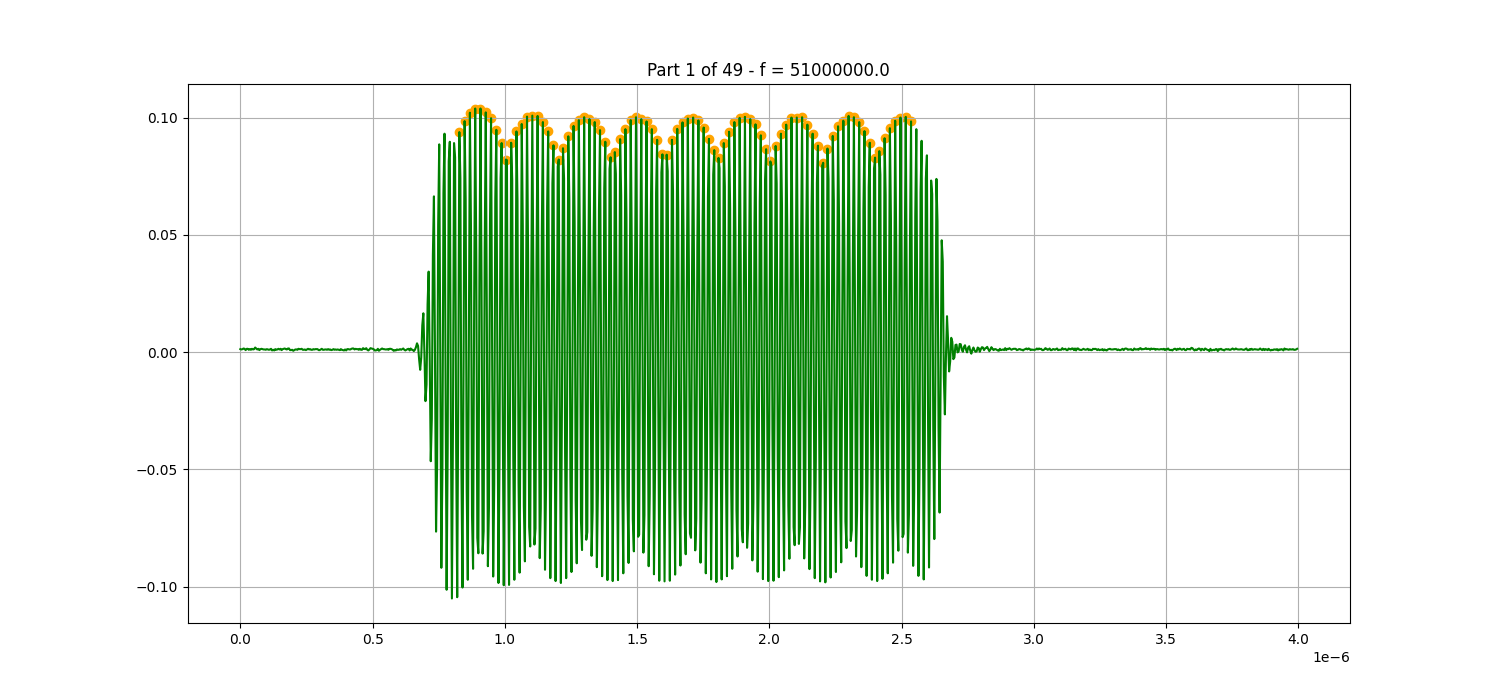

In [ ]:
sweep = 0
f_chosen = fetched_data[sweep]
f = f_chosen['freq']
y = np.array(f_chosen['data'])
fig = plt.subplots(figsize = (15,7))[0]
plt.title(f'Part {sweep+1} of {len(fetched_data)} - f = {f}')
x, idx = data_amps(y, toggle_plot = True)

def on_key(event):
    global sweep
    if event.key == 'right':
        sweep += 1
    elif event.key == 'left':
        sweep -= 1

    if (sweep+1) > len(fetched_data):
        sweep = 0
    elif sweep == -1:
        sweep = len(fetched_data)-1

    f_chosen = fetched_data[sweep]
    y = np.array(f_chosen['data'])
    x, idx = data_amps(y, toggle_plot = False)

    # clear frame
    plt.clf()
    plt.title(f'Part {sweep+1} of {len(fetched_data)} - f = {f}')
    plt.grid()
    plt.plot(x, y)
    # plt.scatter(x[idx],y[idx], color = 'orange')
    plt.draw() # redraw

fig.canvas.mpl_connect('key_press_event',on_key)

# Demodulation with FT

In [ ]:
def weight_factor (ft, range_mask):
    tot_int = np.trapz(ft)

    ft[~range_mask] = 0

    portion = np.trapz(ft)

    return tot_int/portion


In [217]:
def data_fft(y: np.array, freq, sample_rate, toggle_plot = True):
    N = len(y)
    T = 1/sample_rate
    FT = np.fft.fft(y)
    PHI = np.unwrap(np.angle(FT))


    freqs = np.fft.fftfreq(N,T) 
    offset = 5e6
    mask = (freqs < (freq+offset)) & (freqs > (freq-offset))
    maxx = np.max(FT[mask])
    phi = PHI[np.where(FT == maxx)]




    FT = np.fft.fft(y * np.cos(x*freq*2*np.pi + phi))
    # print(FT)
    freqs = np.fft.fftfreq(N,T)  
    region_mask = (freqs >= -.4e8) & (freqs <= .4e8)
    x_region = FT.copy()
    x_region[~region_mask] = 0

    # IFT = np.fft.ifft(x_region*2)
    w_f = weight_factor (np.abs(FT), region_mask)
    print(w_f)
    IFT = np.fft.ifft(x_region*w_f)
    IFT_2 = np.fft.ifft(x_region*2)
    # average = np.average(np.abs(IFT[300:500]))


    AB_IFT = np.abs(IFT)
    AB_IFT_2 = np.abs(IFT_2)
    indices = find_peaks(AB_IFT, height= np.average(AB_IFT))
    idx = indices[0]
    offset = 10
    idx = idx[offset:-offset]
    average = np.average(AB_IFT[idx])
    print(len(AB_IFT))

    if toggle_plot:
        # plt.clf()
        
        # plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f'Part {sweep+1} of {len(fetched_data)} - f = {freq} average = {average}')
        plt.plot(freqs,np.abs(FT))
        plt.subplot(1,2,2)
        plt.plot(np.arange(len(y))*T, AB_IFT, linewidth = 5, color = 'red')
        # plt.plot(AB_IFT_2)
        # plt.scatter(np.arange(len(AB_IFT))[idx]*T,AB_IFT[idx], color = 'orange')
        plt.draw()

1000
2.392791856401368
1000


15

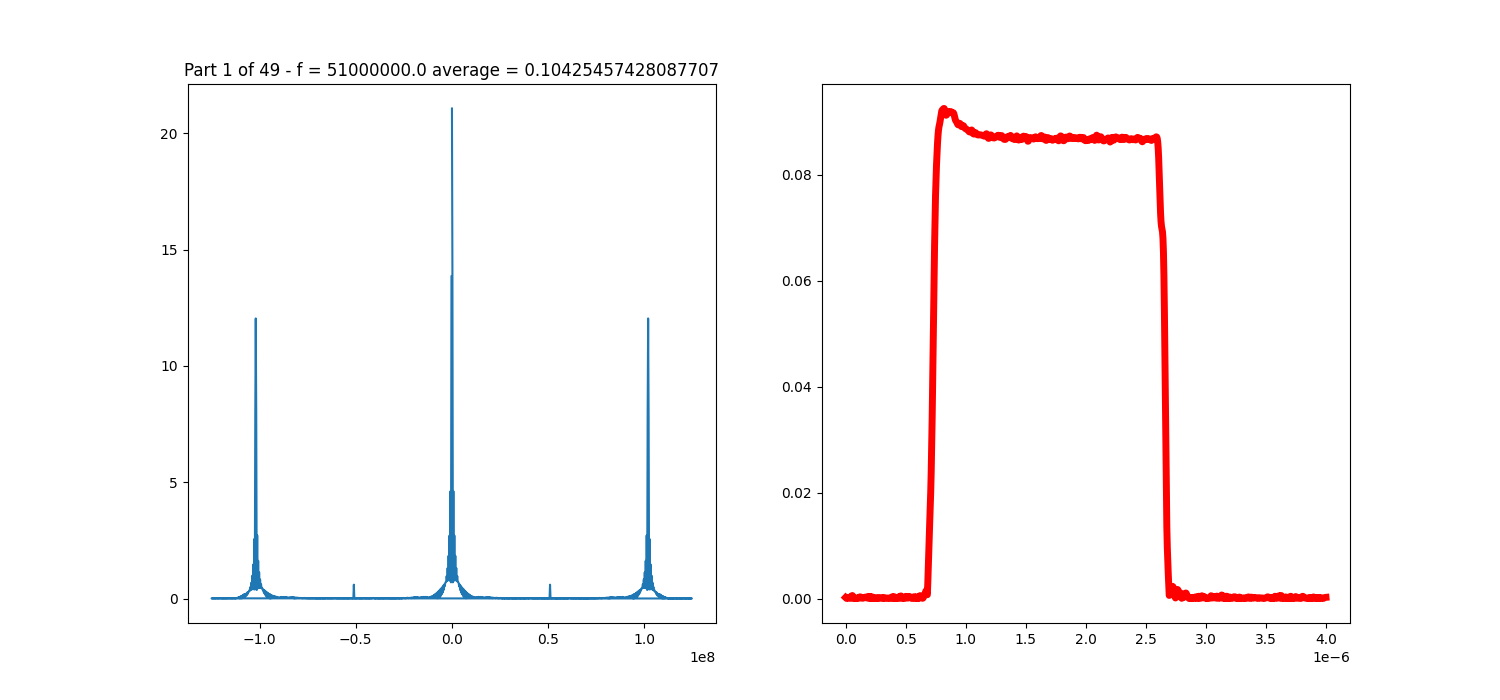

2.3882081656026597
1000
2.5619842192117073
1000
2.5855545271886147
1000
2.58124460467112
1000
2.5391976799912928
1000
2.507904665315039
1000
2.17455231286145
1000


In [219]:
sweep = 0
f_chosen = fetched_data[sweep]
f       = f_chosen['freq']
data    = f_chosen['data']

fig2 = plt.subplots(figsize = (15,7))[0]

y = np.array(data)
x = np.arange(len(y))/sample_rate

plt.clf()
print(len(y))

data_fft(y, f, sample_rate, True)


def on_key_fft(event):
    global sweep
    if event.key == 'right':
        sweep += 1
    elif event.key == 'left':
        sweep -= 1

    if (sweep+1) > len(fetched_data):
        sweep = 0
    elif sweep == -1:
        sweep = len(fetched_data)-1

    f_chosen = fetched_data[sweep]
    f       = f_chosen['freq']
    data    = f_chosen['data']
    y = np.array(data)
    
    plt.clf()
    data_fft(y, f, sample_rate, True) 
    

    # # clear frame
    # plt.clf()
    # plt.title(f'Part {sweep+1} of {len(fetched_data)} - f = {f}')
    # plt.grid()
    # plt.plot(x, y)
    # plt.draw() # redraw

fig2.canvas.mpl_connect('key_press_event',on_key_fft)

1000
2.392791856401368
1000


15

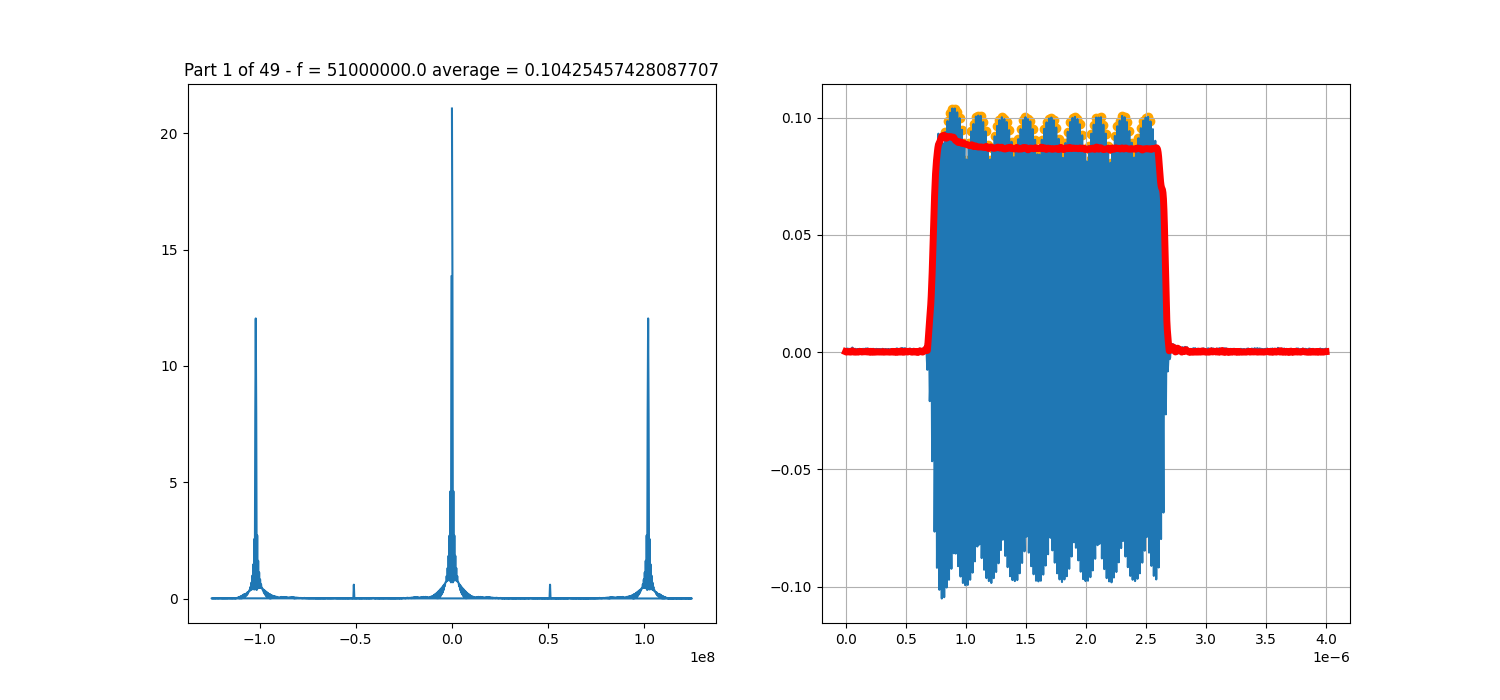

2.3882081656026597
1000


In [220]:
sweep = 0
f_chosen = fetched_data[sweep]
f       = f_chosen['freq']
data    = f_chosen['data']

fig2 = plt.subplots(figsize = (15,7))[0]

y = np.array(data)
x = np.arange(len(y))/sample_rate

plt.clf()
print(len(y))

plt.subplot(1,2,2)
data_amps(y, toggle_plot = True)
data_fft(y, f, sample_rate, True)


def on_key_fft(event):
    global sweep
    if event.key == 'right':
        sweep += 1
    elif event.key == 'left':
        sweep -= 1

    if (sweep+1) > len(fetched_data):
        sweep = 0
    elif sweep == -1:
        sweep = len(fetched_data)-1

    f_chosen = fetched_data[sweep]
    f       = f_chosen['freq']
    data    = f_chosen['data']
    y = np.array(data)
    
    plt.clf()
    
    plt.subplot(1,2,2)
    data_amps(y, toggle_plot = True)
    data_fft(y, f, sample_rate, True) 
    

    # # clear frame
    # plt.clf()
    # plt.title(f'Part {sweep+1} of {len(fetched_data)} - f = {f}')
    # plt.grid()
    # plt.plot(x, y)
    # plt.draw() # redraw

fig2.canvas.mpl_connect('key_press_event',on_key_fft)

- per sistemare il fattore 2, dobbiamo sommare tutto il set FT e dividerlo per il set attorno al picco a f = 0 (integrare tutto e dividere per l'integrale sotto f = 0)
- https://en.wikipedia.org/wiki/Product_detector

# Controllare se il weight factor è corretto, confrontando con media fatta col 2* e con media visiva degli sweep sopra...
